# Ganymede | *Affine Cypher*

The Affine cipher is a monoalphabetic substitution cryptosystem that uses symmetric key encryption. Symmetric key encryption is also called private key encryption. Effectively, private key encryption uses the same key to encrypt and decrypt the data. While private key cryptosystems make the process of encryption faster, generally, the encryption is less secure – especially when compared to public key encryption such as an RSA. One other significant difference is that public key cryptosystems suffer from a key exchanging issue that is not a concern in private key systems.

From the myriad of available analysis techniques, this notebook will focus on three: Frequency analysis – revealing weakness, time complexity – revealing strengths, and space complexity – revealing potential usage.

## Introduction and how to use the notebook:
<br>
<center>*** <b>Important</b>: please make sure to run each block in order by pressing <i>run</i> or <i>control+enter</i> ***</center>

#### This is an example of a Affine cipher coded into Jupyter Notebooks.
When you run the notebook you can choose the word or phrase you would like to "encrypt" and then the following cells display the encryption and decryption process.

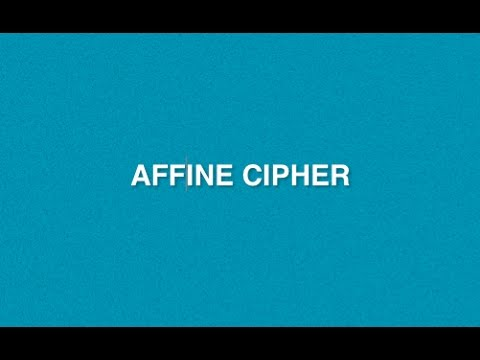

In [1]:
from IPython.display import YouTubeVideo
id='zeqJBCuZYAw'
YouTubeVideo(id=id,width=800,height=350)

#### Import packages:

In [2]:
import os
import numpy as np
import pandas as pd
import cryptomath as cm
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression

#### Checking the key value:

In [3]:
def key_check(shift):
    unusable_keys = (0, 1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 13)
    key = shift
    for entry in unusable_keys:
        if entry == key[0]:
            if key[0] == 0 or key[0] == 12 or key[0] == 26:
                key[0] += 3
            elif key[0] == 1 or key[0] == 13:
                key[0] += 2
            else:
                key[0] += 1
        if entry == key[1]:
            if key[1] == 0 or key[1] == 26:
                key[1] += 1
    key[0] %= 26
    key[1] %= 26
    return key

#### Encryption:

In [4]:
def encrypt(plaintext, key):  # returns the cipher text
    """ C = (a*P + b) % 26 """
    encrypted = ''

    for letter in plaintext:
        if 65 <= ord(letter) <= 90:
            character = str(chr(((key[0] * (ord(letter) - 65) + key[1]) % 26) + 65))
            encrypted += character.upper()

        if 97 <= ord(letter) <= 122:
            character = str(chr(((key[0] * (ord(letter) - 97) + key[1]) % 26) + 97))
            encrypted += character.upper()
    return encrypted

#### Decryption:

In [5]:
def decrypt(encrypted_text, key):  # affine cipher decryption function
    """ P = (a^-1 * (C - b)) % 26 """
    plaintext = ''
    for letter in encrypted_text:
        plaintext += chr(((cm.modinv(key[0], 26) * (ord(letter) - 65 - key[1])) % 26) + 65)
    return plaintext  # returns original text

## Now let's see the Affine Cipher in action:

When you run the block below, try this example to see how it works:

>**Choose a letter, word, or phrase**: The game is afoot

>**Multiplicative Key**: 13

>**Additive Key**: 26

In [6]:
# declaring text and key
text = str(input('Choose a letter, word, or phrase: '))
m, n = np.int(input('Multiplicative Key: ')), np.int(input('Additive Key: '))
shift = [m, n]  # [multiplicative(*) key, additive(+/-) key]

# declaring values for easier reading
affine_encrypted = encrypt(text, key_check(shift))
encrypted_text = affine_encrypted

affine_decrypted = decrypt(encrypt(text, key_check(shift)), key_check(shift))

# calling encryption function
print('\n'+'Encrypted:',affine_encrypted)

# calling decryption function
print('Decrypted:',affine_decrypted.capitalize())

Choose a letter, word, or phrase: The game is afoot
Multiplicative Key: 13
Additive Key: 26

Encrypted: ACJNBZJRLBYDDA
Decrypted: Thegameisafoot


## Frequency Analysis:

Frequency analysis is an effective cryptanalysis technique for evaluating substitution ciphers. When evaluating a substitution cipher, each letter of a given message is replaced with a different value. Meaning, the individual shift of any letter in the plaintext will be transformed into another letter forming the ciphertext.

In English, the frequency of letter usage occurs predictably. For instance, the letter E is the most commonly used, at a rate of 12.702%, and the letter T is the most common first letter, at a rate of 15.978%. So, for example, if N occurs in a ciphertext numerous times, specifically at a higher percentage than any other letter, there is a statistically higher probability that N would represent the plaintext E, but of course, this is not a certainty. N could very well represent one of the other high-use letters, such as T. Due to the uncertainty, a cryptanalyst may need to map several combinations between plaintext and ciphertext to crack the code. There are more complex statistical methods available for cryptanalyses, such as counting bigrams and trigrams. However, for the scope of this paper, the analysis will focus on the relative frequency of use, and relative frequency as the first letter. As such, below are the use and relative frequency as the first letter for our cipher based on the plaintext phrase and the key value.

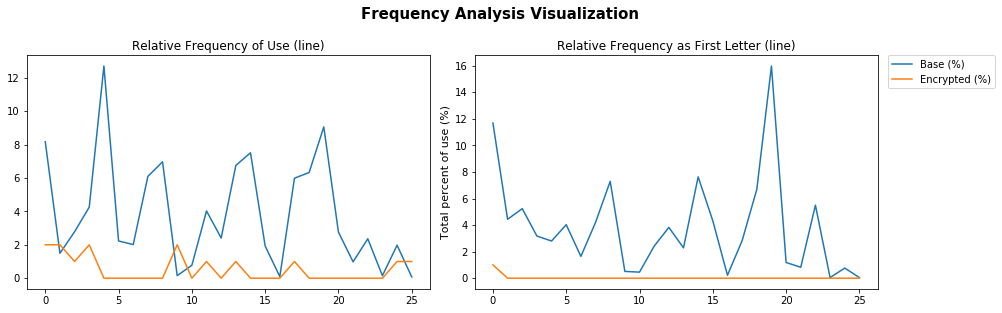

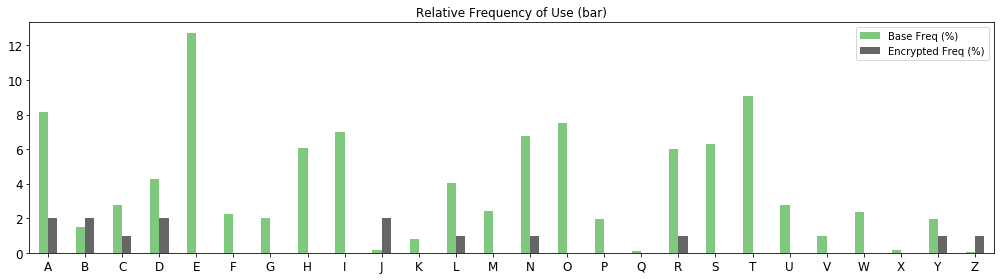

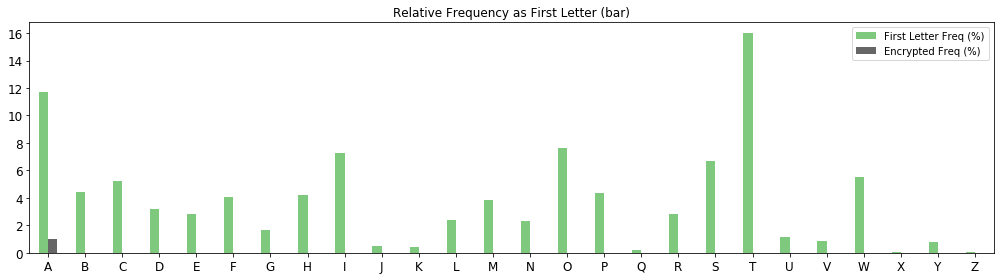

In [7]:
letter = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 
          'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

freq = [8.167, 1.492, 2.782, 4.253, 12.702, 2.228, 2.015, 6.094, 6.966, 0.153, 0.772, 4.025, 2.406, 
        6.749, 7.507, 1.929, 0.095, 5.987, 6.327, 9.056, 2.758, 0.978, 2.360, 0.150, 1.974, 0.074]

cmn_start = [11.682, 4.434, 5.238, 3.174, 2.799, 4.027, 1.642, 4.200, 7.294, 0.511, 0.456, 2.415, 3.826, 
             2.284, 7.631, 4.319, 0.222, 2.826, 6.686, 15.978, 1.183, 0.824, 5.497, 0.045, 0.763, 0.045]

encrypt_freq = []

f_letter = ''.join([idx[0] for idx in encrypted_text.split()])
F_letter = []

for idx in range(len(letter)):
    encrypt_freq += str(encrypted_text.upper().count(letter[idx]))
    encrypt_freq[idx] = float(encrypt_freq[idx])

for idx in range(len(letter)):
    F_letter += str(f_letter.upper().count(letter[idx]))
    F_letter[idx] = float(F_letter[idx])    
    
letter_freq = list(zip(freq, encrypt_freq))
first_letter = list(zip(cmn_start, F_letter))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[14, 4], sharex=True)
ax1.plot(letter_freq); ax1.set_title('Relative Frequency of Use (line)'), ax1.grid(False)
ax2.plot(first_letter); ax2.set_title('Relative Frequency as First Letter (line)'), ax2.grid(False)
plt.suptitle('Frequency Analysis Visualization', 
             fontsize=15, fontweight='bold', x=0.5, y=1.075)
plt.legend(['Base (%)','Encrypted (%)'], bbox_to_anchor=(1.025, 1), 
           loc='upper left', borderaxespad=0.)
plt.ylabel('Total percent of use (%)', fontsize=11)
plt.tight_layout()
plt.savefig('use_fl_line.png', bbox_inches='tight')
plt.show()

df=pd.DataFrame(data = letter_freq, columns=['Base Freq (%)', 'Encrypted Freq (%)'])
df.index = letter
df.plot.bar(colormap='Accent', title='Relative Frequency of Use (bar)', fontsize=12, 
            figsize=[14,4], grid=False)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig('use.png', bbox_inches='tight')
plt.show()

df2=pd.DataFrame(data = first_letter, columns=['First Letter Freq (%)', 'Encrypted Freq (%)'])
df2.index = letter
df2.plot.bar(colormap='Accent', title='Relative Frequency as First Letter (bar)', 
             fontsize=12, figsize=[14,4], grid=False)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig('firstletter.png', bbox_inches='tight')
plt.show()

##### So, would you like to guess the key value?

In [8]:
def decrypt(encrypted_text, key):  # affine cipher decryption function
    """ P = (a^-1 * (C - b)) % 26 """
    plaintext = ''
    for letter in encrypted_text:
        plaintext += chr(((cm.modinv(key[0], 26) * (ord(letter) - 65 - key[1])) % 26) + 65)
    return plaintext  # returns original text

m, n = np.int(input('Guess the multiplicative key: ')), np.int(input('Guess the additive key: '))
guess = [m, n] 

print('\n' + 'Encrypted Text:'+'\n' + encrypted_text)
print('\n' + 'Decrypted Text:'+'\n' + decrypt(encrypted_text, key_check(guess)))

Guess the multiplicative key: 13
Guess the additive key: 26

Encrypted Text:
ACJNBZJRLBYDDA

Decrypted Text:
THEGAMEISAFOOT


## Time Complexity:

Time complexity refers to CPU time used to encrypt the plaintext to ciphertext. Comparisons between the substitution ciphers are based on 1000 iterations were tested on a 1.8 GHz Intel Core i5 processor and measured in microseconds (μs). Microseconds refer to a unit of time equal to one millionth ($10^{−6}$ or
$\frac{1}{1000000})$ of a second. of a second. The results allow for the determination of the overall efficiency of an encryption algorithm.

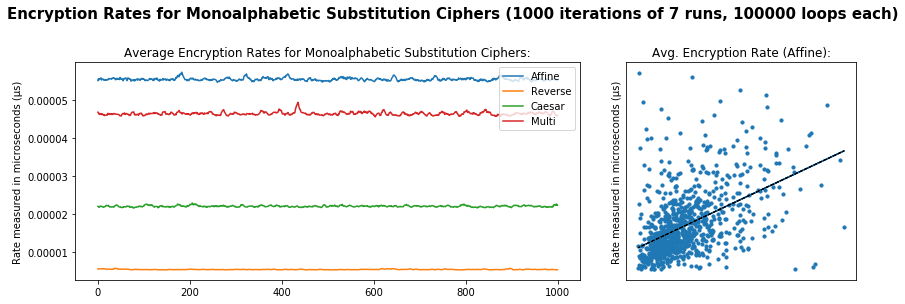

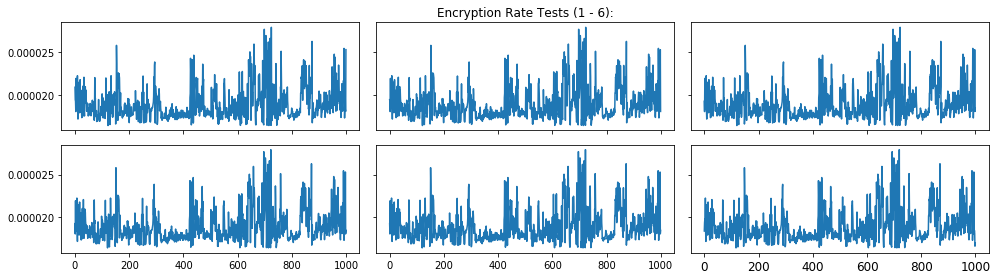

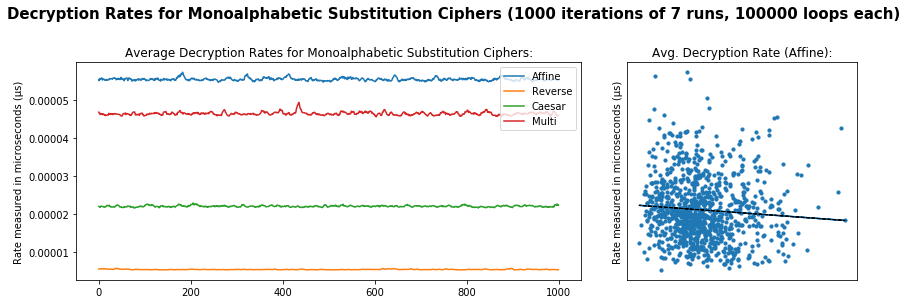

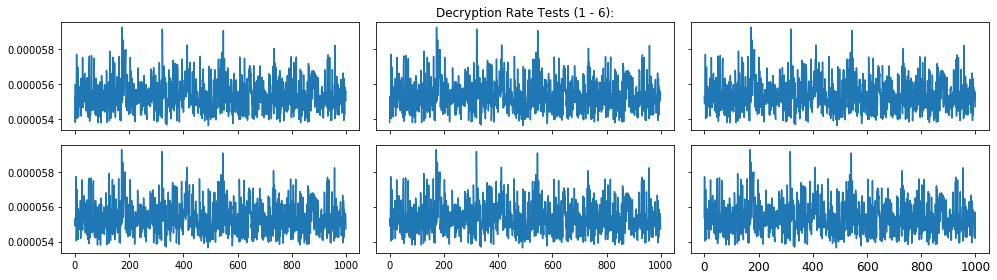

In [9]:
path = str(os.getcwd())+'/csv/'

# Values for Encryption Rate in 1000 iterations of 7 runs, 100000 loops each

en = pd.read_csv(path+'Affine_en-data.csv', index_col=0)
en2 = pd.read_csv(path+'Reverse_en-data.csv', index_col=0)
en3 = pd.read_csv(path+'Caesar_en-data.csv', index_col=0)
en4 = pd.read_csv(path+'Multi_en-data.csv', index_col=0)

en['Average'] = (en['Test 1']+en['Test 2']+en['Test 3']+
                 en['Test 4']+en['Test 5']+en['Test 6']+en['Test 7'])/7
en2['Average'] = (en2['Test 1']+en2['Test 2']+en2['Test 3']+
                  en2['Test 4']+en2['Test 5']+en2['Test 6']+en2['Test 7'])/7
en3['Average'] = (en3['Test 1']+en3['Test 2']+en3['Test 3']+
                  en3['Test 4']+en3['Test 5']+en3['Test 6']+en3['Test 7'])/7
en4['Average'] = (en4['Test 1']+en4['Test 2']+en4['Test 3']+
                  en4['Test 4']+en4['Test 5']+en4['Test 6']+en4['Test 7'])/7

enc = list(zip(en['Average'], en2['Average'], en3['Average'], en4['Average']))

# Values for Decryption Rate in 100 iterations of 7 runs, 10000 loops each

de = pd.read_csv(path+'Affine_de-data.csv', index_col=0)
de2 = pd.read_csv(path+'Reverse_de-data.csv', index_col=0)
de3 = pd.read_csv(path+'Caesar_de-data.csv', index_col=0)
de4 = pd.read_csv(path+'Multi_de-data.csv', index_col=0)

de['Average'] = (de['Test 1']+de['Test 2']+de['Test 3']+
                 de['Test 4']+de['Test 5']+de['Test 6']+de['Test 7'])/7
de2['Average'] = (de2['Test 1']+de2['Test 2']+de2['Test 3']+
                  de2['Test 4']+de2['Test 5']+de2['Test 6']+de2['Test 7'])/7
de3['Average'] = (de3['Test 1']+de3['Test 2']+de3['Test 3']+
                  de3['Test 4']+de3['Test 5']+de3['Test 6']+de3['Test 7'])/7
de4['Average'] = (de4['Test 1']+de4['Test 2']+de4['Test 3']+
                  de4['Test 4']+de4['Test 5']+de4['Test 6']+de4['Test 7'])/7

dec = list(zip(de['Average'], de2['Average'], de3['Average'], de4['Average']))

# Encryption Graphs

fig = plt.figure(figsize=(14,4))
ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, rowspan=2); ax.plot(dec); ax.grid(False)
ax.set_title('Average Encryption Rates for Monoalphabetic Substitution Ciphers:')
plt.ylabel('Rate measured in microseconds (μs)')

data1 = en  # load data set
A = data1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
B = data1.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows
linear_regressor1 = LinearRegression()  # create object for the class
linear_regressor1.fit(A, B)  # perform linear regression
B_pred = linear_regressor1.predict(A)  # make predictions
ax1 = plt.subplot2grid((1, 3), (0, 2), rowspan=2); ax1.plot(A, B_pred); ax1.grid(False)
ax1.scatter(A, B, s=10)
ax1.set_title('Avg. Encryption Rate (Affine):')
plt.plot(A, B_pred, color='k', linestyle='--', linewidth=1)
plt.xticks([], [])
plt.yticks([], [])
plt.ylabel('Rate measured in microseconds (μs)')
ax.legend(['Affine', 'Reverse','Caesar', 'Multi'], loc='upper right', borderaxespad=0.5)
plt.suptitle('Encryption Rates for Monoalphabetic Substitution Ciphers' 
             +' (1000 iterations of 7 runs, 100000 loops each)', 
             fontsize=15, fontweight='bold', x=0.5, y=1.075)
plt.savefig('time_encrypt.png', bbox_inches='tight')

fig, ((ax2, ax3, ax4), (ax5, ax6, ax7)) = plt.subplots(2, 3, figsize=[14, 4], 
                                                       sharex='col', sharey='row')
ax2.plot(en['Test 2']); ax2.grid(False), ax3.set_title('Encryption Rate Tests (1 - 6):')
ax3.plot(en['Test 3']); ax3.grid(False), ax4.plot(en['Test 4']); ax4.grid(False)
ax5.plot(en['Test 4']); ax5.grid(False), ax6.plot(en['Test 4']); ax6.grid(False)
ax7.plot(en['Test 7']); ax7.grid(False)

plt.xticks(
    rotation = 0,
    horizontalalignment = 'center',
    fontsize = 12,
)
plt.tight_layout()
plt.savefig('time_encrypt-tests.png', bbox_inches='tight')
plt.show()

# Decryption Graphs

fig = plt.figure(figsize=(14,4))
ax = plt.subplot2grid((1, 3), (0, 0), colspan=2, rowspan=2); ax.plot(dec); ax.grid(False)
ax.set_title('Average Decryption Rates for Monoalphabetic Substitution Ciphers:')
plt.ylabel('Rate measured in microseconds (μs)')

data = de  # load data set
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
ax1 = plt.subplot2grid((1, 3), (0, 2), rowspan=2); ax1.plot(X, Y_pred); ax1.grid(False)
ax1.scatter(X, Y, s=10)
ax1.set_title('Avg. Decryption Rate (Affine):')
plt.plot(X, Y_pred, color='k', linestyle='--', linewidth=1)
plt.xticks([], [])
plt.yticks([], [])
plt.ylabel('Rate measured in microseconds (μs)')
ax.legend(['Affine', 'Reverse','Caesar', 'Multi'], loc='upper right', borderaxespad=0.5)
plt.suptitle('Decryption Rates for Monoalphabetic Substitution Ciphers' 
             +' (1000 iterations of 7 runs, 100000 loops each)', 
             fontsize=15, fontweight='bold', x=0.5, y=1.075)
plt.savefig('time_decrypt.png', bbox_inches='tight')

fig, ((ax2, ax3, ax4), (ax5, ax6, ax7)) = plt.subplots(2, 3, figsize=[14, 4], 
                                                       sharex='col', sharey='row')
ax2.plot(de['Test 2']); ax2.grid(False), ax3.set_title('Decryption Rate Tests (1 - 6):')
ax3.plot(de['Test 3']); ax3.grid(False), ax4.plot(de['Test 4']); ax4.grid(False)
ax5.plot(de['Test 4']); ax5.grid(False), ax6.plot(de['Test 4']); ax6.grid(False)
ax7.plot(de['Test 7']); ax7.grid(False)

plt.xticks(
    rotation = 0,
    horizontalalignment = 'center',
    fontsize = 12,
)
plt.tight_layout()
plt.savefig('time_decrypt-tests.png', bbox_inches='tight')
plt.show()

#### ANALYSIS AND CONCLUSION:

Encrypting a single phrase using the four monoalphabetic substitution ciphers with the same key, or a multiple of the key when unavailable, generates the obtained results. Based on implementation and the obtained results, it can be concluded that while the affine cipher – a combination of the Caesar and Multiplicative ciphers – may not be the fastest encryption algorithm among the four, the security benefits outweigh the loss of speed. The Reverse cipher, on-the-other-hand, is by far the fastest algorithm but provides a trivial amount of security. Thus, the observable trade-off of using the affine cipher is preferential over the remaining three algorithms.

## Space Complexity:

Space complexity is the analysis of the memory space used by a given cryptosystem. If the cipher uses less memory or drive space, then, overall, the information transfers more efficiently. The analysis is performed by creating a file which contains an original word, phrase, or paragraph – using Lorem Ipsum text generation – and then comparing the resulting encryption and decryption of the same file by size in bytes.

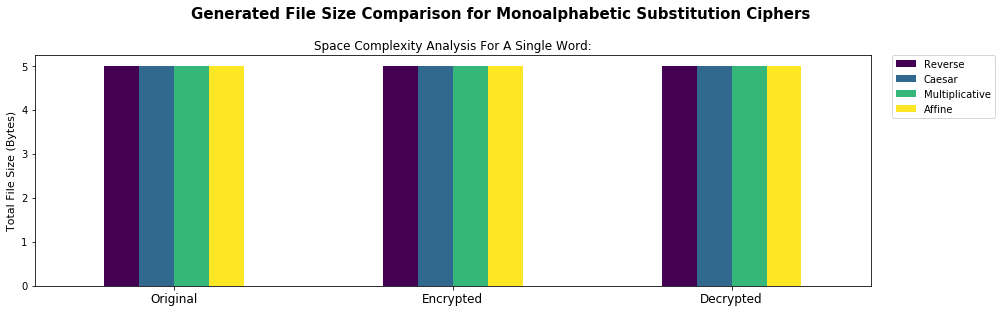

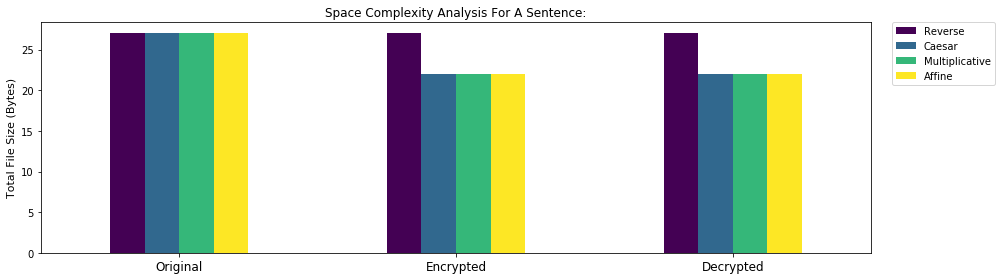

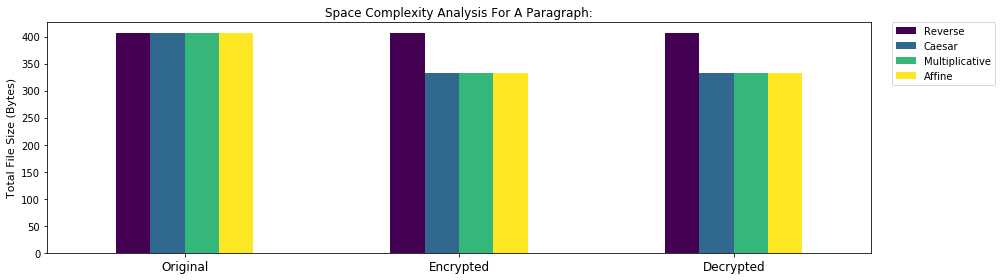

In [10]:
'''
Analyses the generated file sizes in states prior to encryption, after encryption, 
and after decryption for various classical additive, mono-and-polyalphabetic, and 
transpositional ciphers.
'''
path = str(os.getcwd())+'/SpaceAnalysis/'

# Reverse:
Reverse_w = [os.stat(path+'Reverse-word_plaintext.txt').st_size, os.stat(path+'Reverse-word_encrypted.txt').st_size, os.stat(path+'Reverse-word_decrypted.txt').st_size]
Reverse_p = [os.stat(path+'Reverse-phrase_plaintext.txt').st_size, os.stat(path+'Reverse-phrase_encrypted.txt').st_size, os.stat(path+'Reverse-phrase_decrypted.txt').st_size]
Reverse_g = [os.stat(path+'Reverse-paragraph_plaintext.txt').st_size, os.stat(path+'Reverse-paragraph_encrypted.txt').st_size, os.stat(path+'Reverse-paragraph_decrypted.txt').st_size]

# Caesar:
Caesar_w = [os.stat(path+'Caesar-word_plaintext.txt').st_size, os.stat(path+'Caesar-word_encrypted.txt').st_size, os.stat(path+'Caesar-word_decrypted.txt').st_size]
Caesar_p = [os.stat(path+'Caesar-phrase_plaintext.txt').st_size, os.stat(path+'Caesar-phrase_encrypted.txt').st_size, os.stat(path+'Caesar-phrase_decrypted.txt').st_size]
Caesar_g = [os.stat(path+'Caesar-paragraph_plaintext.txt').st_size, os.stat(path+'Caesar-paragraph_encrypted.txt').st_size, os.stat(path+'Caesar-paragraph_decrypted.txt').st_size]

# Multiplicative:
Multi_w = [os.stat(path+'Multi-word_plaintext.txt').st_size, os.stat(path+'Multi-word_encrypted.txt').st_size, os.stat(path+'Multi-word_decrypted.txt').st_size]
Multi_p = [os.stat(path+'Multi-phrase_plaintext.txt').st_size, os.stat(path+'Multi-phrase_encrypted.txt').st_size, os.stat(path+'Multi-phrase_decrypted.txt').st_size]
Multi_g = [os.stat(path+'Multi-paragraph_plaintext.txt').st_size, os.stat(path+'Multi-paragraph_encrypted.txt').st_size, os.stat(path+'Multi-paragraph_decrypted.txt').st_size]

# Affine:
Affine_w = [os.stat(path+'Affine-word_plaintext.txt').st_size, os.stat(path+'Affine-word_encrypted.txt').st_size, os.stat(path+'Affine-word_decrypted.txt').st_size]
Affine_p = [os.stat(path+'Affine-phrase_plaintext.txt').st_size, os.stat(path+'Affine-phrase_encrypted.txt').st_size, os.stat(path+'Affine-phrase_decrypted.txt').st_size]
Affine_g = [os.stat(path+'Affine-paragraph_plaintext.txt').st_size, os.stat(path+'Affine-paragraph_encrypted.txt').st_size, os.stat(path+'Affine-paragraph_decrypted.txt').st_size]
Affc = pd.read_csv(path+'Affine_space-data.csv', index_col=0)

word = list(zip(Reverse_w, Caesar_w, Multi_w, Affine_w))
phrase = list(zip(Reverse_p, Caesar_p, Multi_p, Affine_p))
paragraph = list(zip(Reverse_g, Caesar_g, Multi_g, Affine_g))

phase = ['Original', 'Encrypted', 'Decrypted']

df=pd.DataFrame(data = word, columns=['Reverse', 'Caesar', 'Multiplicative', 'Affine'])
df.index = phase
df.plot.bar(colormap='viridis', title='Space Complexity Analysis For A Single Word:', 
            fontsize=10, figsize=[14,4], grid=False)
plt.suptitle('Generated File Size Comparison for Monoalphabetic Substitution Ciphers', 
             fontsize=15, fontweight='bold', x=0.5, y=1.075)
plt.xticks(
    rotation = 0,
    horizontalalignment = 'center',
    fontsize = 12,
)
plt.ylabel('Total File Size (Bytes)', fontsize=11)
plt.legend(['Reverse', 'Caesar', 'Multiplicative', 'Affine'], bbox_to_anchor=(1.025, 1), 
           loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig('space_word.png', bbox_inches='tight')
plt.show()

df=pd.DataFrame(data = phrase, columns=['Reverse', 'Caesar', 'Multiplicative', 'Affine'])
df.index = phase
df.plot.bar(colormap='viridis', title='Space Complexity Analysis For A Sentence:', 
            fontsize=10, figsize=[14,4], grid=False)
plt.xticks(
    rotation = 0,
    horizontalalignment = 'center',
    fontsize = 12,
)
plt.ylabel('Total File Size (Bytes)', fontsize=11)
plt.legend(['Reverse', 'Caesar', 'Multiplicative', 'Affine'], bbox_to_anchor=(1.025, 1), 
           loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig('space_phrase.png', bbox_inches='tight')
plt.show()

df=pd.DataFrame(data = paragraph, columns=['Reverse', 'Caesar', 'Multiplicative', 'Affine'])
df.index = phase
df.plot.bar(colormap='viridis', title='Space Complexity Analysis For A Paragraph:', 
            fontsize=10, figsize=[14,4], grid=False)
plt.xticks(
    rotation = 0,
    horizontalalignment = 'center',
    fontsize = 12,
)
plt.ylabel('Total File Size (Bytes)', fontsize=11)
plt.legend(['Reverse', 'Caesar', 'Multiplicative', 'Affine'], bbox_to_anchor=(1.025, 1), 
           loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.savefig('space_paragraph.png', bbox_inches='tight')
plt.show()

#### ANALYSIS AND CONCLUSION:

Analyzing the graphs above, there is no statistically significant difference in file size. In fact, the only difference between the cryptosystems is in the handling of blank spaces between words. It so happens that the only cipher which retains the spaces is the Atbash cipher. The retention of spaces in a substitution cipher increases the likelihood that a cipher can be cracked.